## Восканян Юрий. КИ22-17/1б. Практическая работа №4
## Тема: Восстановлени регрессии

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from missingno import matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [72]:
df = pd.read_csv('train.csv', index_col='id')
id_column = df.index

### Предварительная обработка данных

In [73]:
df.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


<Axes: >

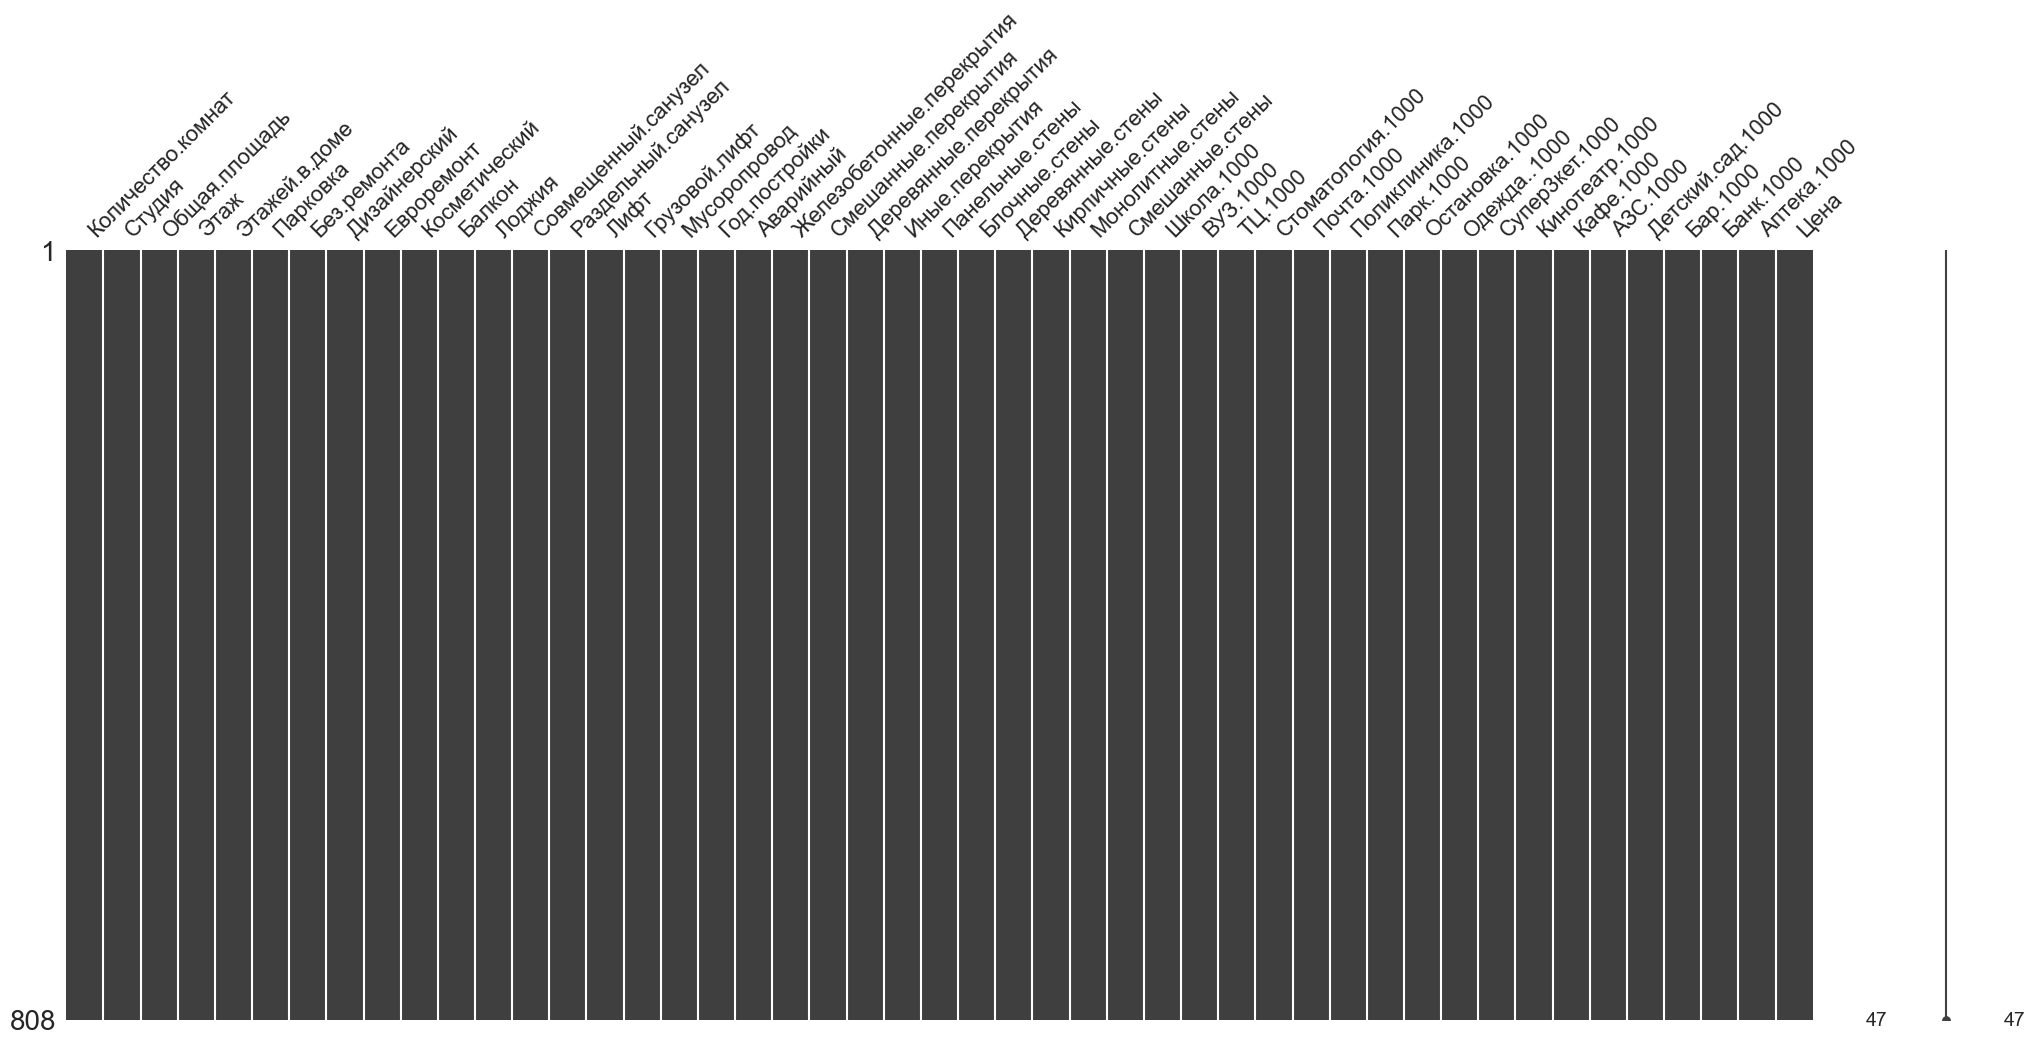

In [74]:
matrix(df)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 896 to 458
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  
 1

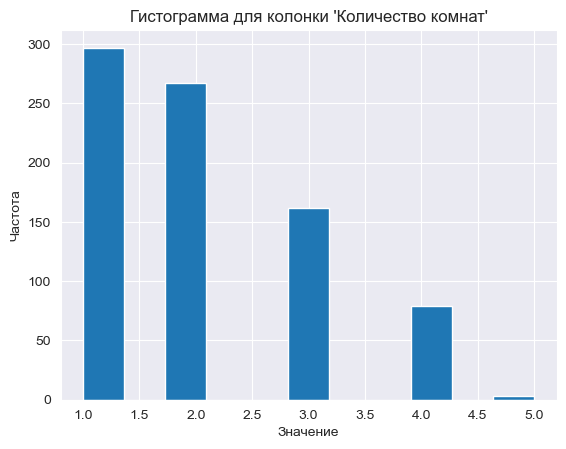

In [76]:
# Определение количества столбцов по правилу Стёрджеса
bins = round(np.log2(len(df))) + 1
df['Количество.комнат'].hist(bins=bins)
plt.title('Гистограмма для колонки \'Количество комнат\'')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

C:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


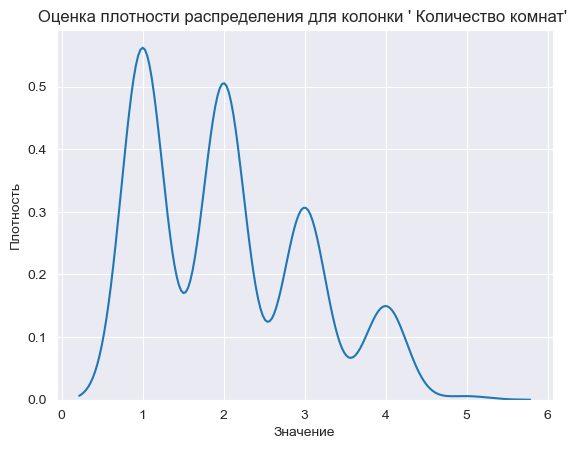

In [77]:
# Оценка плотности распределения
sns.kdeplot(df['Количество.комнат'])
plt.title('Оценка плотности распределения для колонки \' Количество комнат\' ')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()


In [78]:
# Применение standart scaler к числовым переменным
prices = df['Цена']
df.drop(columns=['Цена'], inplace=True)
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=df.columns)
df.index = id_column
df['Цена'] = prices


In [79]:
df

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
id,,,,,,,,,,,,,,,,,,,,,
896,-0.039783,-0.206351,-0.241288,-0.504138,-0.828280,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,-0.514603,-0.379971,-0.087812,0.305051,-0.034901,-0.361191,0.035673,0.561748,2350000.0
399,-0.039783,-0.206351,-0.311941,0.027989,-0.828280,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.479121,0.100030,-0.379971,-0.087812,0.305051,-0.299690,-0.529207,-0.401052,-0.306352,1799000.0
1515,-0.039783,-0.206351,0.111976,-1.036265,0.013544,-0.407364,2.975510,-0.159313,-0.336077,-1.841549,...,-0.414134,1.943928,-0.379971,-0.310582,0.305051,0.494677,-0.193176,0.035673,0.189705,2800000.0
1216,-0.039783,-0.206351,0.667104,-0.238074,-0.828280,-0.407364,-0.336077,-0.159313,2.975510,-1.841549,...,1.340526,0.100030,2.266721,5.258657,-0.306565,-0.432085,4.007208,3.675047,0.437734,3970000.0
677,-1.044311,-0.206351,-0.882209,-1.036265,0.224000,-0.407364,-0.336077,6.276942,-0.336077,-1.841549,...,-0.609096,-0.514603,-0.379971,-0.644736,0.305051,-0.564479,-0.697222,-0.546627,-0.926424,1880000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,-1.044311,-0.206351,-0.645018,0.294053,0.013544,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.544108,-1.436552,-0.379971,-0.644736,-1.529797,-0.696874,-0.697222,-0.546627,-1.050438,1700000.0
562,0.964744,-0.206351,-0.241288,-0.238074,-1.038737,2.454809,-0.336077,-0.159313,-0.336077,0.543021,...,2.250349,1.021979,2.266721,1.248805,0.305051,-0.034901,-0.025161,0.472398,0.437734,2400000.0
407,-1.044311,-0.206351,-0.846883,1.092244,1.486737,-0.407364,-0.336077,-0.159313,-0.336077,0.543021,...,-0.674083,-1.436552,-0.379971,-0.867505,-0.918181,-1.094057,-0.529207,-0.983352,-1.298467,1950000.0


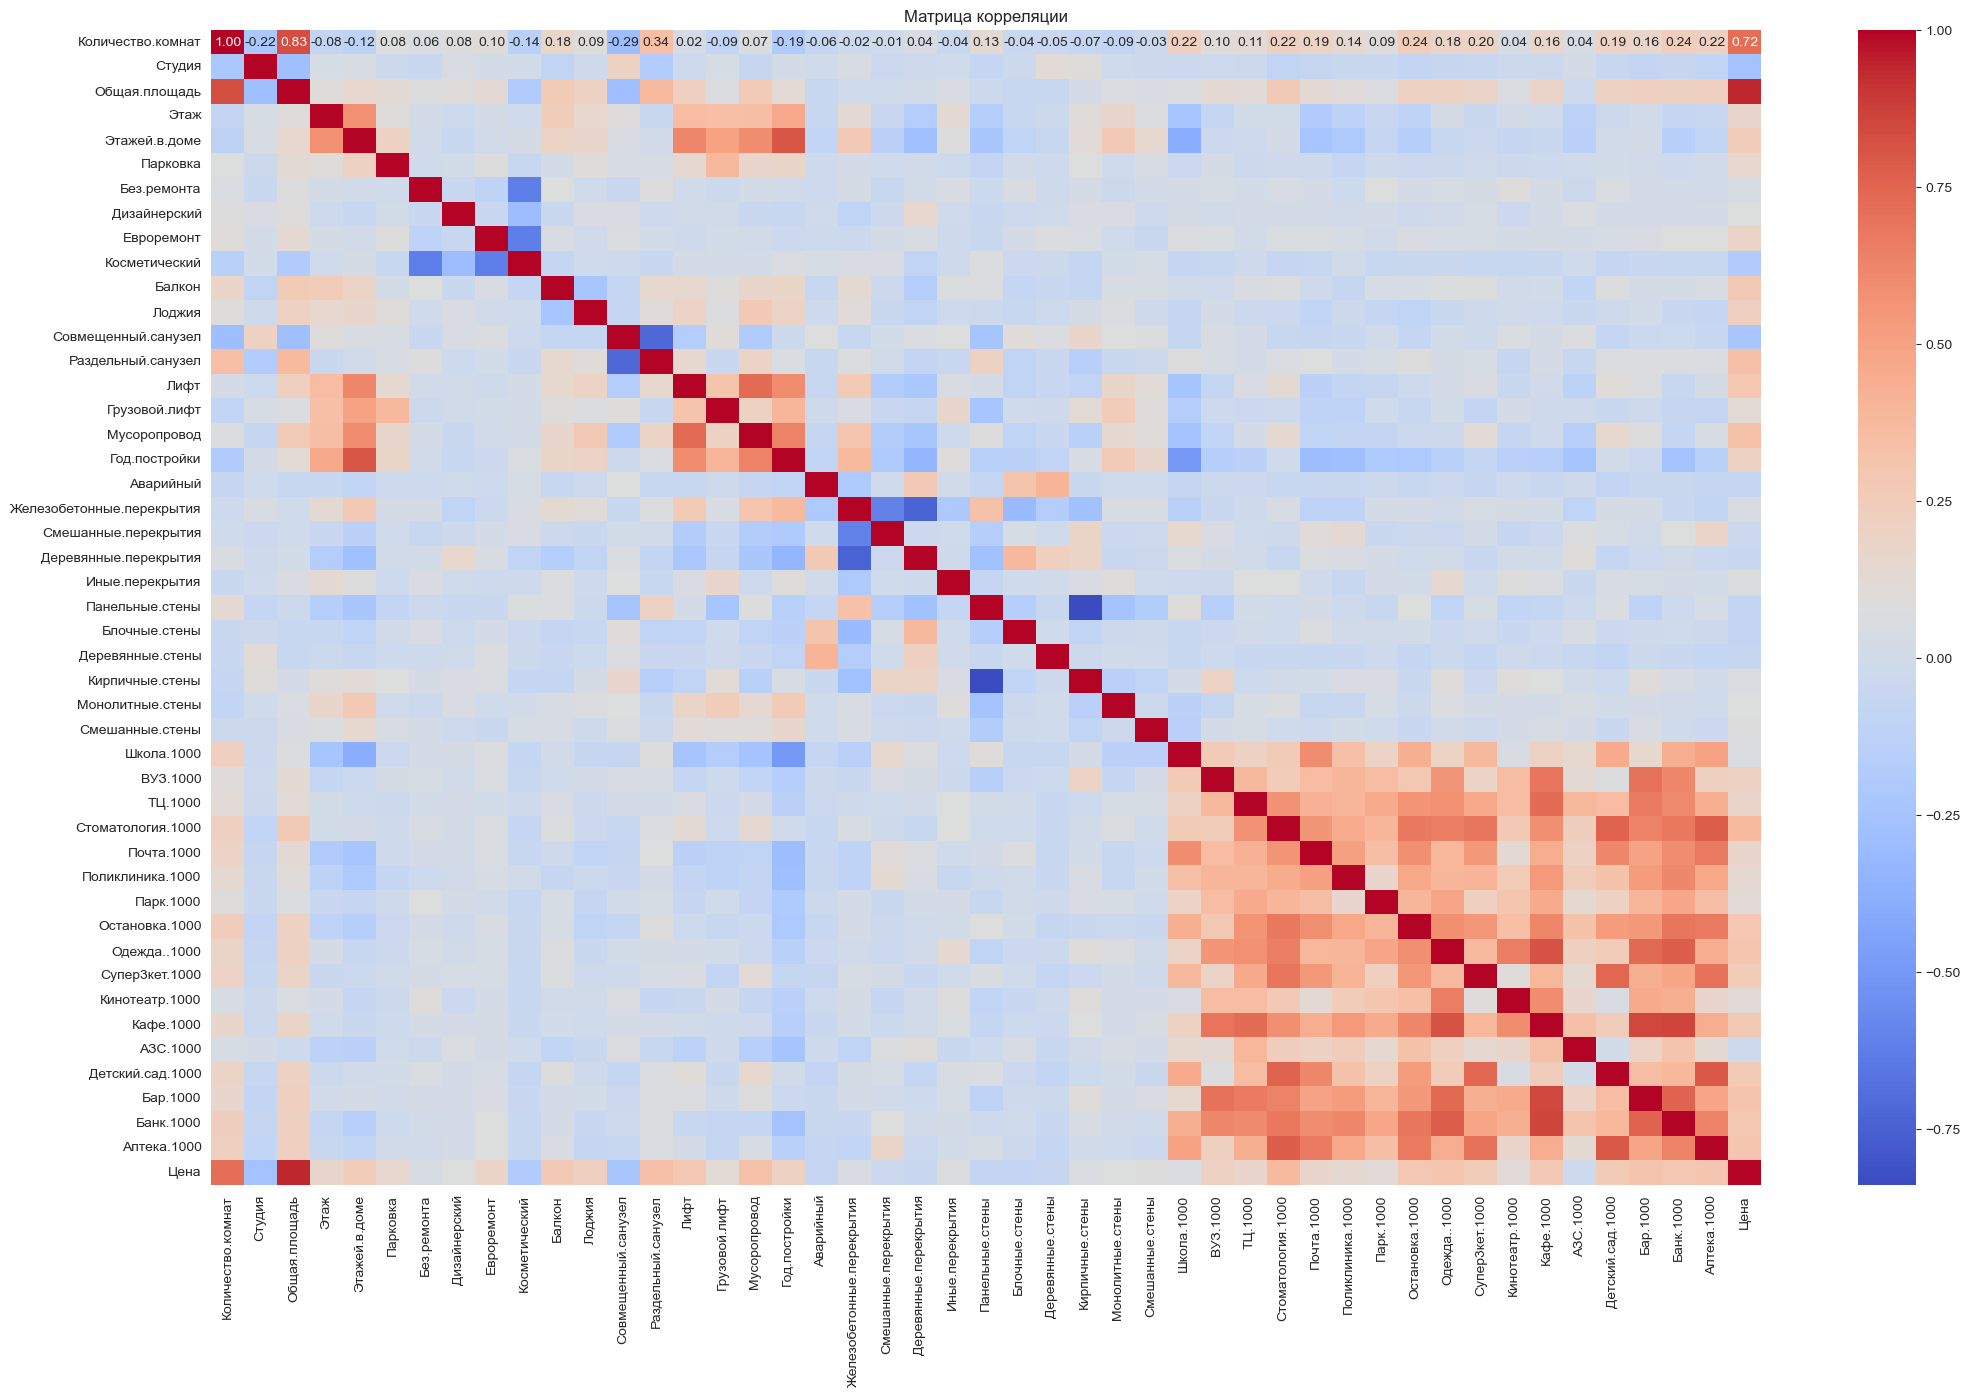

In [80]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [81]:
len(df.columns)

47

In [82]:
# # 1. Вычислите корреляции между зависимой переменной и всеми остальными признаками
# correlations = df.corr()['Цена'].abs()
# 
# # 2. Отфильтруйте признаки с низкой корреляцией (например, меньше 0.3)
# low_correlation_features = correlations[correlations < 0.3].index.tolist()
# 
# # 3. Удалите столбцы с низкой корреляцией из DataFrame
# df = df.drop(columns=low_correlation_features)
correlation_matrix = df.corr().abs()['Цена']
weakly_correlated_columns = correlation_matrix[correlation_matrix < 0.3].index.tolist()
df.drop(columns=weakly_correlated_columns, inplace=True, axis=1)


In [83]:
len(df.columns)

7

In [84]:
y = df['Цена']
X = df.drop('Цена', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

"""
X_train: матрица признаков для обучения модели (70% случайно выбранных данных из X).
X_test: матрица признаков для тестирования модели (30% оставшихся данных из X).
y_train: целевая переменная (цены квартир) для обучения модели, соответствующая X_train.
y_test: целевая переменная (цены квартир) для тестирования модели, соответствующая X_test
"""


'\nX_train: матрица признаков для обучения модели (70% случайно выбранных данных из X).\nX_test: матрица признаков для тестирования модели (30% оставшихся данных из X).\ny_train: целевая переменная (цены квартир) для обучения модели, соответствующая X_train.\ny_test: целевая переменная (цены квартир) для тестирования модели, соответствующая X_test\n'

In [85]:
stratified_k_fold = KFold(n_splits=7, random_state=42, shuffle=True)
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_accuracy = np.sqrt(mean_squared_error(y_test, tree.predict(X_test)))

tree_accuracy = 475548.24756414053


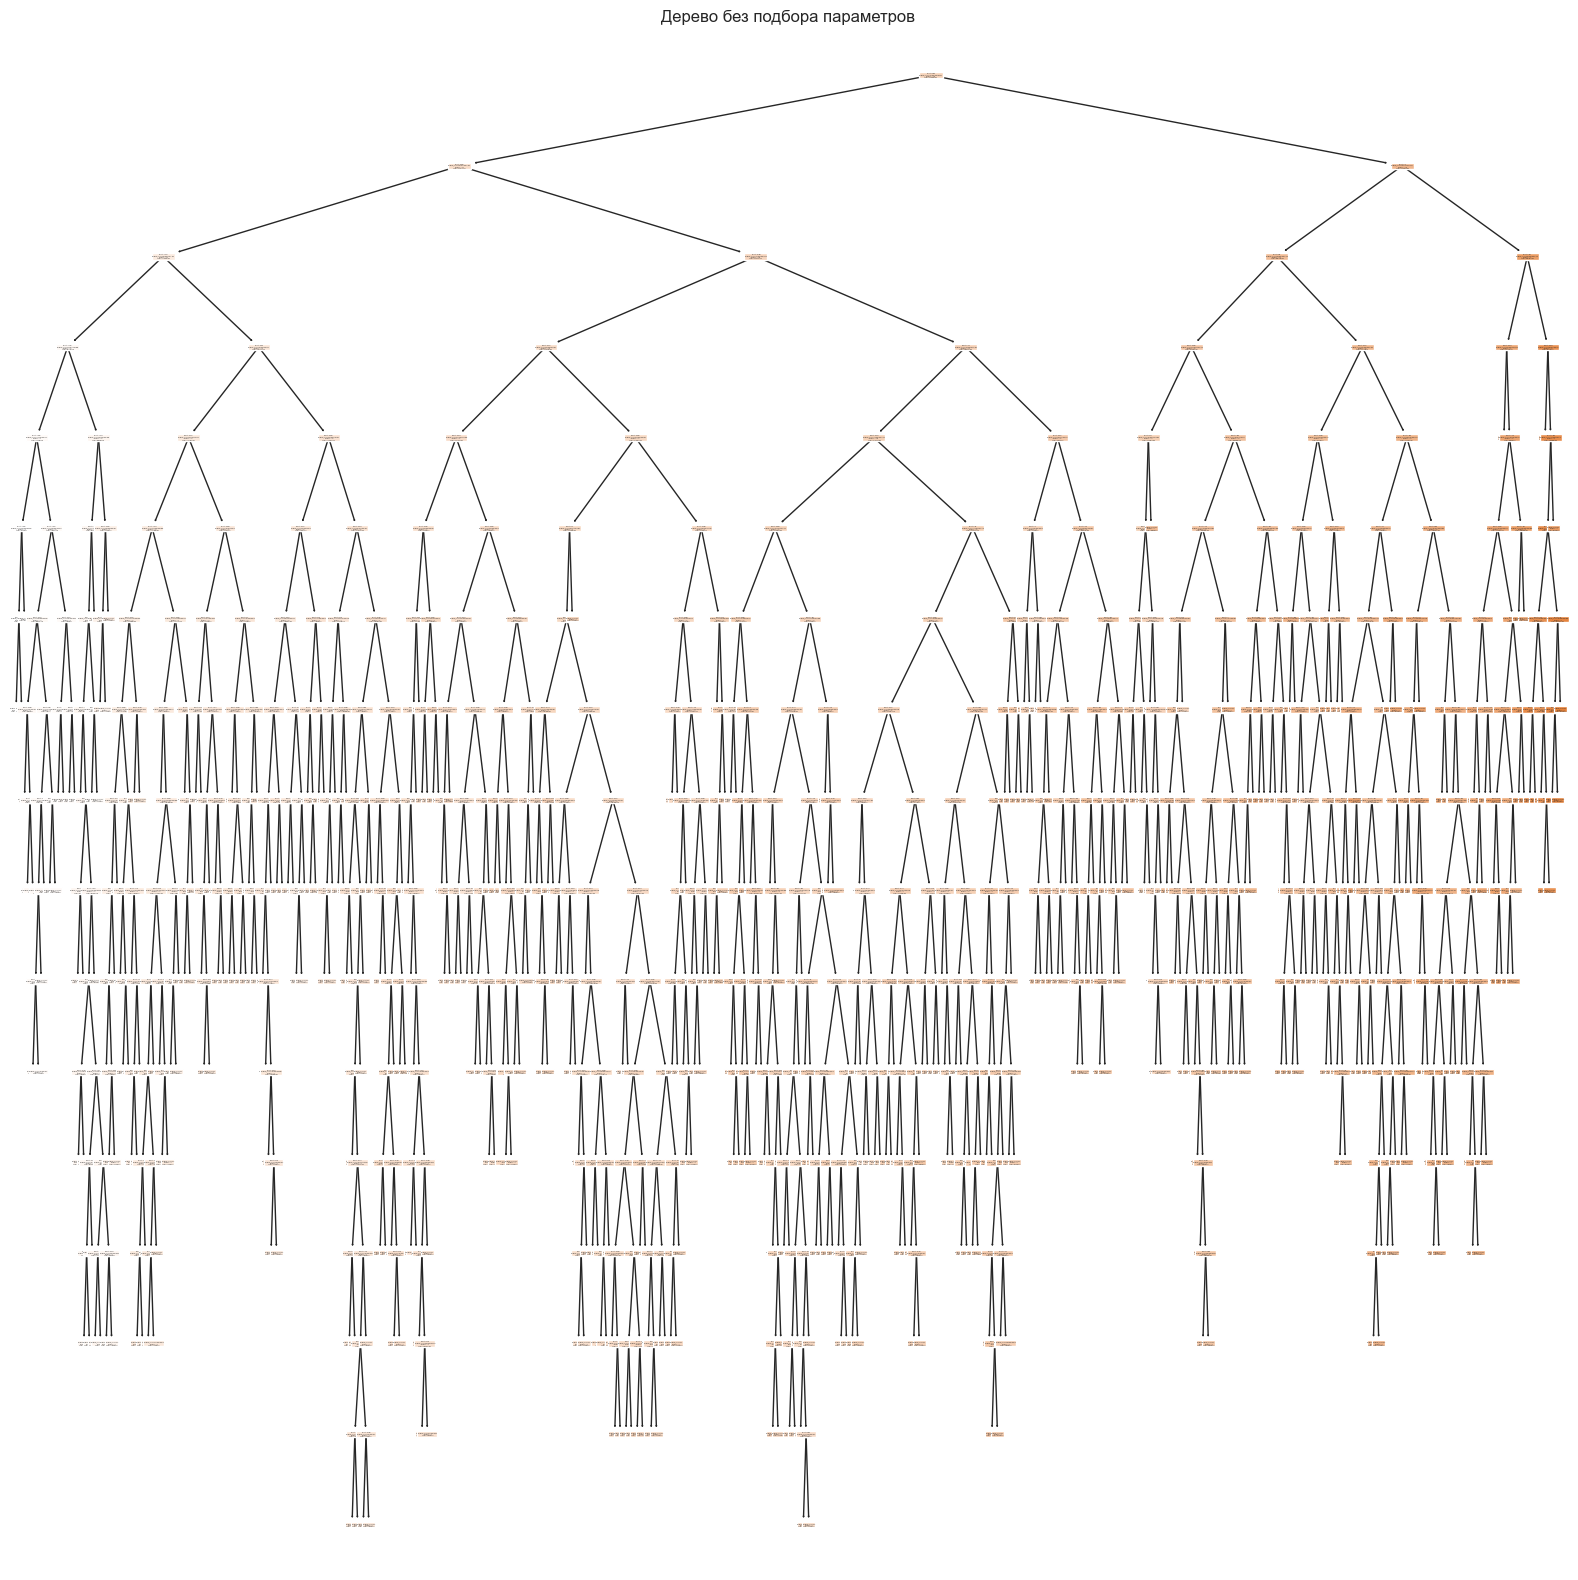

In [86]:
print(f'{tree_accuracy = }')
plt.figure(figsize=(20, 20))    
plot_tree(tree, filled=True)
plt.title("Дерево без подбора параметров")
plt.show()


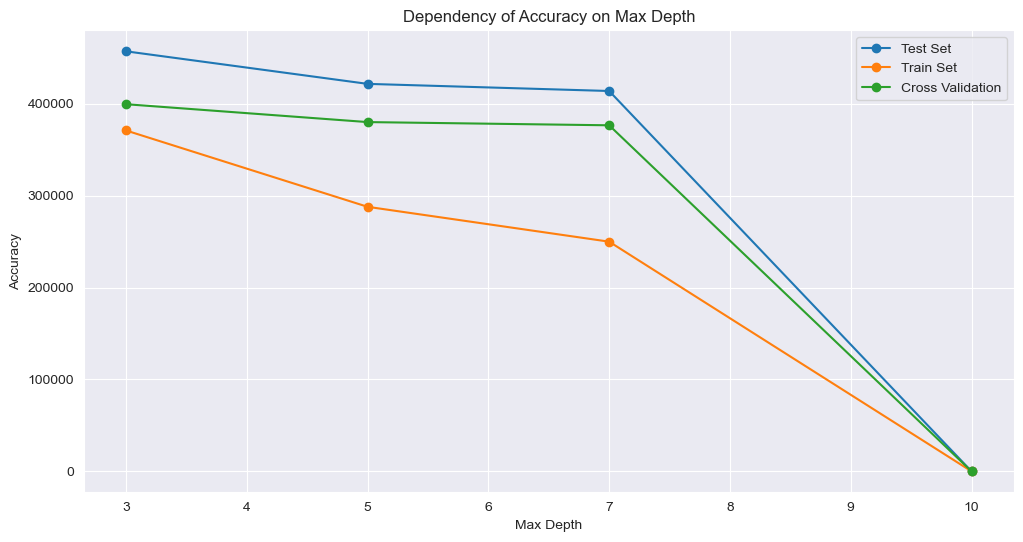

In [87]:
max_depths = [3, 5, 7, 10]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]

# Инициализация списков для сохранения результатов
test_scores = [0] * len(max_depths)
train_scores = [0] * len(max_depths)
cv_scores = [0] * len(max_depths)


# Перебор всех комбинаций параметров
for i, (max_depth, min_samples_split, min_samples_leaf) in enumerate(zip(max_depths, min_samples_splits, min_samples_leafs)):
    tree_clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
    tree_clf.fit(X_train, y_train)
    
    test_score = np.sqrt(mean_squared_error(y_test, tree_clf.predict(X_test)))
    test_scores[i] = test_score
    
    train_score = np.sqrt(mean_squared_error(y_train, tree_clf.predict(X_train)))
    train_scores[i] = train_score
    
    cv_score = np.abs(cross_val_score(tree_clf, X_train, y_train, cv=stratified_k_fold, scoring="neg_root_mean_squared_error").mean())
    cv_scores[i] = cv_score

plt.figure(figsize=(12, 6))

plt.plot(max_depths, test_scores, marker='o', label='Test Set')
plt.plot(max_depths, train_scores, marker='o', label='Train Set')
plt.plot(max_depths, cv_scores, marker='o', label='Cross Validation')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Dependency of Accuracy on Max Depth')

plt.legend()
plt.grid(True)
plt.show()


In [88]:

# Вывод оптимальных значений параметров
best_idx = np.argmax(cv_scores)
optimal_max_depth = max_depths[best_idx]
optimal_min_samples_split = min_samples_splits[best_idx]
optimal_min_samples_leaf = min_samples_leafs[best_idx]

print("Optimal parameters:")
print(f"Max Depth: {optimal_max_depth}")
print(f"Min Samples Split: {optimal_min_samples_split}")
print(f"Min Samples Leaf: {optimal_min_samples_leaf}")

Optimal parameters:
Max Depth: 3
Min Samples Split: 2
Min Samples Leaf: 1


In [89]:
test_data = pd.read_csv('test.csv', index_col='id')
id_column = test_data.index

In [90]:
scaled_test_data = standard_scaler.transform(test_data)
test_data = pd.DataFrame(scaled_test_data, columns=test_data.columns, index=test_data.index)
test_data.index = id_column

In [91]:
test_data.drop(columns=weakly_correlated_columns, inplace=True, axis=1)
len(test_data.columns)

6

In [92]:
# Создание и обучение дерева до обрезки
tree_clf = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples_leaf, min_samples_split=optimal_min_samples_split)
tree_clf.fit(X_train, y_train)
tree_score = r2_score(y_test, tree_clf.predict(X_test))
print(f'Accuracy score дерева до обрезки: {tree_score}')

# Обрезка дерева после обучения
pruned_tree_clf = DecisionTreeRegressor(max_depth=optimal_max_depth, min_samples_leaf=optimal_min_samples_leaf, min_samples_split=optimal_min_samples_split)
pruned_tree_clf.fit(X_train, y_train)
tree_score_after_pruning = r2_score(y_test, pruned_tree_clf.predict(X_test))
print(f'Accuracy score дерева после обрезки: {tree_score_after_pruning}')

Accuracy score дерева до обрезки: 0.7931538542324612
Accuracy score дерева после обрезки: 0.7980036607107659


In [93]:
y_pred_test = pruned_tree_clf.predict(test_data)
result_df = pd.DataFrame({'Цена': y_pred_test})
result_df.index = id_column

In [94]:
result_df.to_csv('result.csv')